# imports


In [1]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean, std
from scipy.stats import norm

# Plotting a Histogram

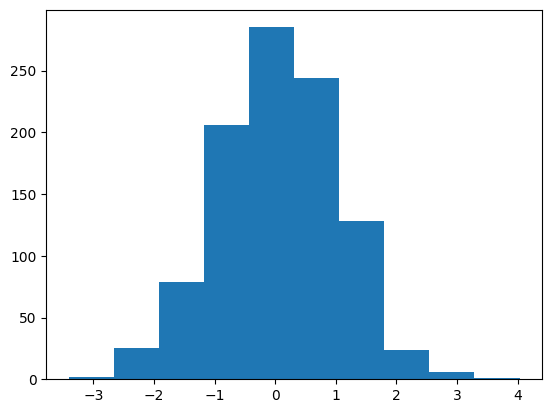

In [4]:
sample = normal(size = 1000)
pyplot.hist(sample, bins = 10)
pyplot.show()

While plotting a histogram, it is important to plot it using the right number of bins. In the above diagram, you used 10 bins. See what happens if you use 4 bins. 

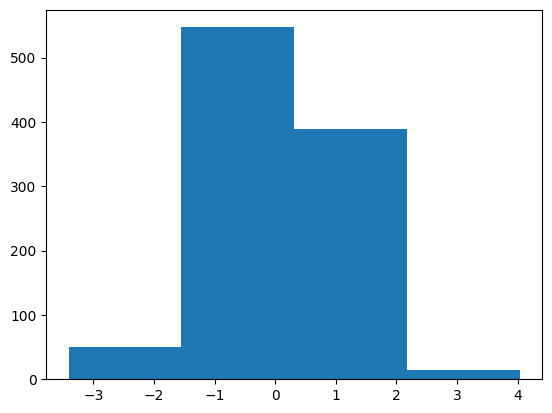

In [5]:
pyplot.hist(sample, bins = 4)
pyplot.show()

# Performing Parametric Density Estimation

In [6]:
sample = normal(loc = 50, scale = 5, size = 1000)
sample

array([53.24819091, 58.68333356, 44.50780053, 55.29881227, 60.30240449,
       52.38156914, 41.29767421, 49.16829659, 42.73322346, 51.33967696,
       54.37834689, 47.73873968, 52.32249903, 51.39455514, 52.47503494,
       47.50306787, 44.99882462, 47.82952484, 43.66977939, 55.492363  ,
       53.3815119 , 51.60835525, 48.16326938, 48.87264118, 53.9505408 ,
       52.52168556, 57.08565117, 53.8263493 , 48.8675453 , 51.46234805,
       52.84814224, 48.52331505, 53.9903123 , 56.43167114, 47.04703711,
       46.56602472, 48.46919055, 47.66165469, 48.47110305, 49.34682106,
       44.96334118, 47.46318009, 50.42410326, 56.16780712, 53.86378912,
       49.71143428, 51.41128499, 61.52248561, 56.08150017, 47.02619634,
       52.46310653, 59.14246225, 39.79273421, 51.85903549, 45.03517882,
       61.4798522 , 46.65864537, 53.70681932, 45.29634438, 42.63108374,
       52.36833792, 50.24580179, 51.68301666, 44.90907582, 49.30973582,
       46.94165964, 48.44404514, 46.8918103 , 50.9298589 , 57.59

In [7]:
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=50.013, Standard Deviation=4.846


define a normal distribution with the above mean and standard deviation.

In [12]:
# define the distribution
dist = norm(sample_mean, sample_std) # create a normal distribution
dist

find the probability distribution for the distribution defined above.

In [13]:
values = [value for value in range(30, 70)] # generate a range of x values
probabilities = [dist.pdf(value) for value in values] # calculate the probability for the range
probabilities

[1.627355304222357e-05,
 3.7359839480911305e-05,
 8.219226113294345e-05,
 0.00017328467796373027,
 0.00035010048128150694,
 0.000677842134228574,
 0.0012576729569705595,
 0.0022361976835689177,
 0.003810271941935467,
 0.00622164261932307,
 0.009735481996923008,
 0.014598665708390435,
 0.0209783911406199,
 0.028889132582007596,
 0.03812414690055626,
 0.04821354614926954,
 0.05843073176749356,
 0.0678604732478873,
 0.07552587257813949,
 0.0805522967681242,
 0.08233100427971891,
 0.08064031339985989,
 0.07569101162299745,
 0.06808316257723297,
 0.05868653137622474,
 0.048477528549138185,
 0.03837477205327694,
 0.029110821116305283,
 0.021162472714474516,
 0.014742857763928908,
 0.00984238272602356,
 0.006296832353268481,
 0.0038605334663718025,
 0.0022681711455304738,
 0.0012770492010910652,
 0.0006890373230890083,
 0.00035627157445439916,
 0.0001765317830936149,
 8.382391709792045e-05,
 3.814312789047837e-05]

 plot the distribution you’ve defined on top of the sample data.

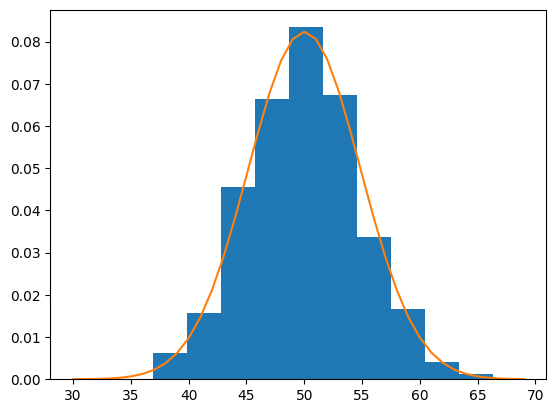

In [14]:
pyplot.hist(sample, bins = 10, density = True) # plot the sample data
pyplot.plot(values, probabilities) # plot the distribution
pyplot.show()

# Performing Non-Parametric Density Estimation

In [16]:
from numpy import asarray, exp, hstack
from sklearn.neighbors import KernelDensity

use two normal samples and join them together to get a sample that does not fit any known common distribution


In [19]:
sample1 = normal(loc = 20, scale = 3, size = 300)
sample2 = normal(loc = 40, scale = 5, size = 700)
sample = hstack((sample1, sample2))
sample

array([18.85444831, 16.15800471, 19.28422563, 18.84417388, 13.53307371,
       16.4752252 , 13.47032049, 19.20148168, 16.78324234, 23.57769882,
       18.29872423, 20.07895541, 21.7063148 , 16.661683  , 18.02732331,
       18.33309774, 23.58406654, 19.04087894, 22.53834565, 27.8757789 ,
       18.02382325, 19.71242921, 26.48914159, 18.4911694 , 17.71771762,
       17.61832988, 18.90715647, 20.33872616, 18.6472864 , 21.99907862,
       17.98251916, 15.74624889, 18.53797923, 19.88273329, 19.9333683 ,
       21.00872268, 17.20666227, 24.15810404, 15.37306022, 18.00762233,
       22.5945658 , 21.14091992, 16.88124474, 23.31554396, 19.98660292,
       18.41890808, 21.46364252, 18.35721212, 20.32567617, 20.73629089,
       22.78898107, 22.46632785, 18.36500615, 20.73405191, 19.76430355,
       18.47595689, 14.41087256, 24.60938994, 19.05152529, 25.34360808,
       16.98253252, 21.4398647 , 23.69837038, 21.25190737, 15.54176544,
       19.10680419, 19.68344317, 24.07542381, 25.20279887, 16.94

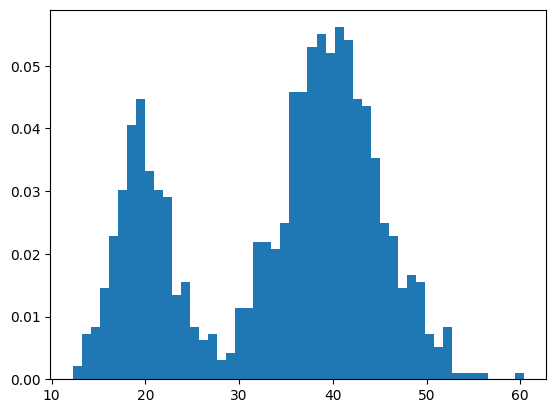

In [20]:
pyplot.hist(sample, bins = 50, density = True)
pyplot.show()

# use Kernel density estimation to get a model, which you can then fit to your sample to create a probability distribution curve.  

In [30]:
model = KernelDensity(bandwidth = 3, kernel = 'gaussian')
sample = sample.reshape(len(sample), 1)
model.fit(sample)

KernelDensity(bandwidth=3)

In [31]:
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1)) # make a column vector
probabilities = model.score_samples(values) # calculate the log probability for each value
probabilities = exp(probabilities) # transform the log probabilities to real probabilities
probabilities

array([3.93222198e-07, 1.44964337e-06, 4.84753924e-06, 1.47331917e-05,
       4.07972341e-05, 1.03220059e-04, 2.39423328e-04, 5.11153850e-04,
       1.00893365e-03, 1.85014260e-03, 3.16750091e-03, 5.08600073e-03,
       7.68771399e-03, 1.09665014e-02, 1.47813222e-02, 1.88275696e-02,
       2.26527393e-02, 2.57335296e-02, 2.76028724e-02, 2.79827448e-02,
       2.68670704e-02, 2.45207801e-02, 2.14022534e-02, 1.80485697e-02,
       1.49681861e-02, 1.25682695e-02, 1.11217095e-02, 1.07656272e-02,
       1.15207637e-02, 1.33230530e-02, 1.60584778e-02, 1.95891324e-02,
       2.37581836e-02, 2.83709396e-02, 3.31665460e-02, 3.78064730e-02,
       4.18990343e-02, 4.50568110e-02, 4.69643638e-02, 4.74318134e-02,
       4.64224858e-02, 4.40548838e-02, 4.05819959e-02, 3.63491958e-02,
       3.17347480e-02, 2.70852873e-02, 2.26648703e-02, 1.86329605e-02,
       1.50546131e-02, 1.19326207e-02, 9.24414008e-03, 6.96623920e-03,
       5.08359262e-03, 3.58188800e-03, 2.43679666e-03, 1.60772226e-03,
      

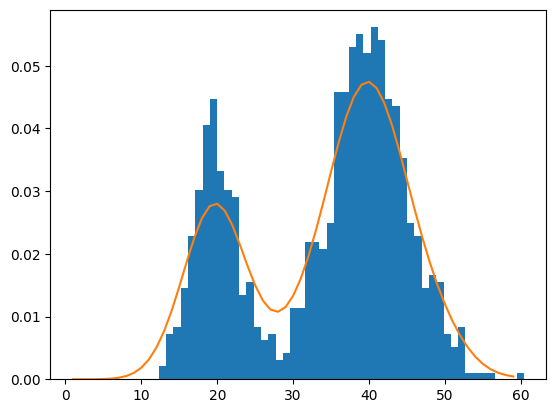

In [32]:
pyplot.hist(sample, bins = 50, density = True)
pyplot.plot(values, probabilities)
pyplot.show()